# Download AMeDAS time series (hourly, daily) and sounding data






In [13]:
from download_time_series import download_amedas
from plot import plot_hourly_temp_hum_wind


dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=40&block_no=47646&year=2022&month=02&day=01&view=


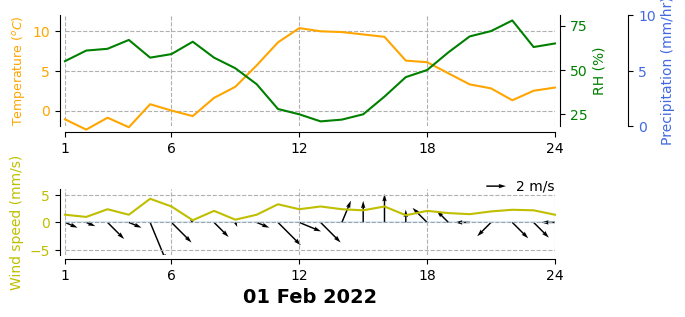

In [14]:
opath = 'data_download/' 
point = '47646' # Tsukuba station
date = pd.Timestamp('2022-02-01')

dat, link = download_amedas(point, date, opath, 'hourly' )
time.sleep(0.2)

plot_hourly_temp_hum_wind(dat)

dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=40&block_no=47646&year=2024&month=03&day=16&view=


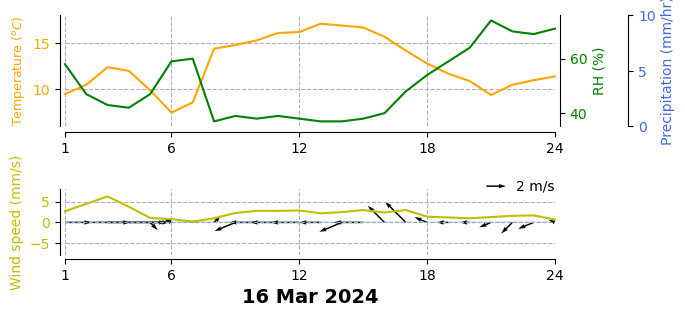

In [15]:
opath = 'data_download/' 
point = '47646' # Tsukuba station
date = now = pd.Timestamp.now()  - pd.Timedelta('1 day') 

dat, link = download_amedas(point, date, opath, 'hourly' )
time.sleep(0.2)


plot_hourly_temp_hum_wind(dat)

In [6]:
point = '47646' # Tsukuba station
date_range = pd.date_range('2020-12-28', '2020-12-31', freq='d')
for date in date_range:
    dat, link = download_amedas(point, date, opath, 'hourly' )
    time.sleep(0.2)

dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=40&block_no=47646&year=2020&month=12&day=28&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=40&block_no=47646&year=2020&month=12&day=29&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=40&block_no=47646&year=2020&month=12&day=30&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=40&block_no=47646&year=2020&month=12&day=31&view=


In [7]:
amedas_file = 'Amedas_list.csv'
alist = pd.read_csv(amedas_file, index_col=0)   

points = [str(s) for s in alist['station_id'].values]
date_range = pd.date_range('2020-12-01', '2020-12-03', freq='d')

for point in points[:2]:
    for date in date_range:
        dat, link = download_amedas(point, date, opath, 'hourly' )
        time.sleep(0.2)   

dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=11&block_no=47401&year=2020&month=12&day=01&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=11&block_no=47401&year=2020&month=12&day=02&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=11&block_no=47401&year=2020&month=12&day=03&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_a1.php?prec_no=11&block_no=0002&year=2020&month=12&day=01&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_a1.php?prec_no=11&block_no=0002&year=2020&month=12&day=02&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_a1.php?prec_no=11&block_no=0002&year=2020&month=12&day=03&view=


In [16]:
from download_sounding import get_data_sonde
from plot import plot_basemap, plot_sounding

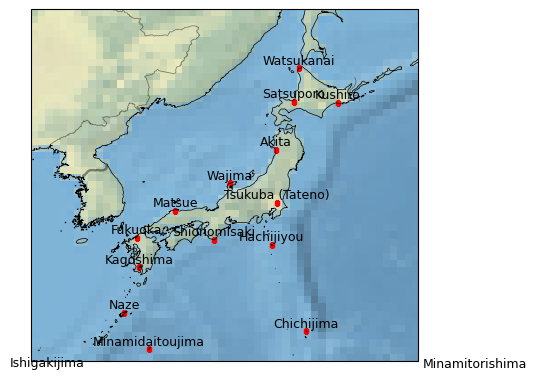

In [19]:
amedas_file = 'Amedas_list.csv'
alist = pd.read_csv(amedas_file, index_col=0).set_index('station_id')
    
#==========GET ALL AMEDAS INFORMATION==========================================
#https://www.jma.go.jp/jma/en/Activities/upper/upper.html
kansho = [47401, 47412, 47418, 47582, 47600, 47646,
          47678, 47741, 47778, 47807, 47827, 47909,
          47918, 47945, 47971, 47991, 
          89532] # last one is Showwa Kichi
    
fig, ax = plot_basemap()

for p in kansho[:-1]:
    lon, lat = alist.loc[p]['longitude'], alist.loc[p]['latitude']
    plt.scatter(lon, lat, color='r',s=10, alpha=1, marker='s')
    plt.text(lon,lat+0.1, alist.loc[p]['station_name_roman'].replace('（',' (').replace('）',')'), 
             va = 'bottom',ha = 'center',
             fontsize=9)

2022-06-01 09:00:00
*** 指定気圧面の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/hourly_usp.php?year=2022&month=06&day=01&hour=9&atm=&point=47646&view=
*** 気温・湿度の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/daily_uth.php?year=2022&month=06&day=01&hour=9&atm=&point=47646&view=
*** 風の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/daily_uwd.php?year=2022&month=06&day=01&hour=9&atm=&point=47646&view=


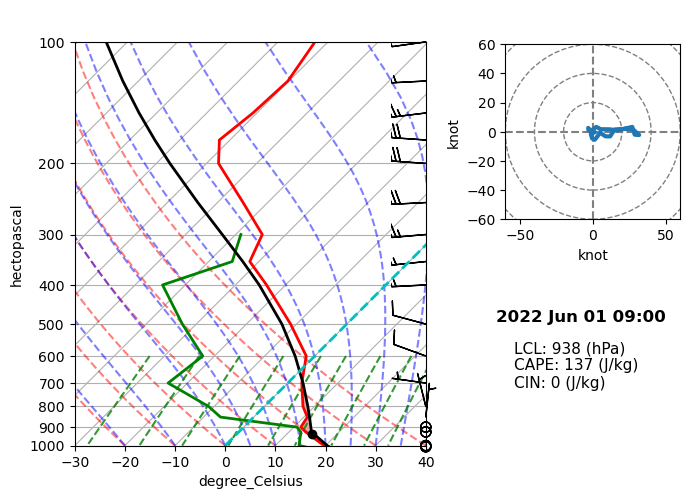

In [20]:
point =  '47646' # Tsukuba station
    
opath = 'data_download/' 

# download single point for a specific date
        
date = pd.Timestamp('2022-06-01 9h')

data = get_data_sonde(point, date, opath)

time.sleep(0.2)

df = data['noisuy']

plot_sounding(df,date,odir='fig/')

2024-03-17 21:00:00
2024-03-17 21:00:00
*** 指定気圧面の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/hourly_usp.php?year=2024&month=03&day=17&hour=21&atm=&point=47646&view=
*** 気温・湿度の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/daily_uth.php?year=2024&month=03&day=17&hour=21&atm=&point=47646&view=
*** 風の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/daily_uwd.php?year=2024&month=03&day=17&hour=21&atm=&point=47646&view=
2024-03-17 21:00:00 
 **** 
 File not exist 
 **** 

2024-03-17 21:00:00
*** 指定気圧面の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/hourly_usp.php?year=2024&month=03&day=17&hour=21&atm=&point=47646&view=
*** 気温・湿度の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/daily_uth.php?year=2024&month=03&day=17&hour=21&atm=&point=47646&view=
*** 風の観測データ ****
trying to access:   https://www.data.jma.go.jp/

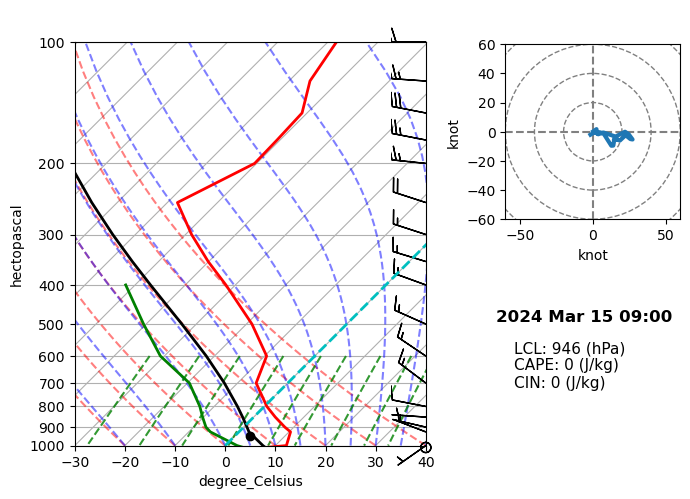

In [22]:
gmt = pd.Timedelta('9h')
now = pd.Timestamp.now()  
date = now.floor(freq='12H') + gmt  # the latest date possible
print(date)
data = get_data_sonde(point, date, opath+'/sonde/')

i = 0
while len(data) == 0:
    data = get_data_sonde(point, date, opath+'/sonde/')
    time.sleep(0.2)
    date = date - pd.Timedelta('12h')
    i=i+1
    if i == 6: break # go back two days until get data


print(data)
df = data['noisuy']
plot_sounding(df,date,odir='fig/')
    